<a href="https://colab.research.google.com/github/noorsaba5/Analysing-Data/blob/main/Survey%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"survey_data.csv"

This dataset provides a comprehensive view of 10,000 individuals, encompassing demographics (age, gender, education, employment), financial aspects (annual income, spending score), and work-life balance (work hours per week, satisfaction score). The data is complete with no missing values, and initial analysis reveals potential outliers in age, income, and work hours. Visualizations like histograms and bar plots highlight distributions, while a correlation matrix and box plots unveil relationships between variables, suggesting connections between income, education, employment, and spending habits. Further investigation into outliers and deeper correlation analysis is recommended for a more comprehensive understanding of the data.

## Data loading

### Subtask:
Load the survey data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the survey data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('survey_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'survey_data.csv' not found. Please provide the correct file path.")
    df = None  # Set df to None to indicate an error
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None

,Respondent_ID,Age,Annual_Income,Satisfaction_Score,Work_Hours_Per_Week,Spending_Score,Gender,Education_Level,Employment_Status
0,1,39,39822,1.22,12,79.29,Non-binary,High School,Self-employed
1,2,33,45417,4.94,61,73.98,Non-binary,High School,Retired
2,3,41,41039,4.20,37,23.41,Female,Master's Degree,Employed
3,4,50,51656,4.48,38,32.00,Non-binary,Master's Degree,Student
4,5,32,67957,3.78,39,78.86,Non-binary,High School,Employed


## Data exploration

### Subtask:
Explore the loaded survey data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, missing values, summary statistics, and unique values for categorical columns.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Determine data types of each column
print("\nData types of each column:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())
print("\nPercentage of missing values per column:\n", (df.isnull().sum() / len(df)) * 100)

# Generate summary statistics for numerical columns
print("\nSummary statistics for numerical columns:\n", df.describe())

# Analyze categorical columns
for col in ['Gender', 'Education_Level', 'Employment_Status']:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

Shape of the DataFrame: (10000, 9)

Data types of each column:
 Respondent_ID            int64
Age                      int64
Annual_Income            int64
Satisfaction_Score     float64
Work_Hours_Per_Week      int64
Spending_Score         float64
Gender                  object
Education_Level         object
Employment_Status       object
dtype: object

Missing values per column:
 Respondent_ID          0
Age                    0
Annual_Income          0
Satisfaction_Score     0
Work_Hours_Per_Week    0
Spending_Score         0
Gender                 0
Education_Level        0
Employment_Status      0
dtype: int64

Percentage of missing values per column:
 Respondent_ID          0.0
Age                    0.0
Annual_Income          0.0
Satisfaction_Score     0.0
Work_Hours_Per_Week    0.0
Spending_Score         0.0
Gender                 0.0
Education_Level        0.0
Employment_Status      0.0
dtype: float64

Summary statistics for numerical columns:
        Respondent_ID           

## Data visualization

### Subtask:
Visualize the distributions of numerical and categorical features in the survey data.


**Reasoning**:
Visualize the distributions of numerical and categorical features using histograms and bar plots.



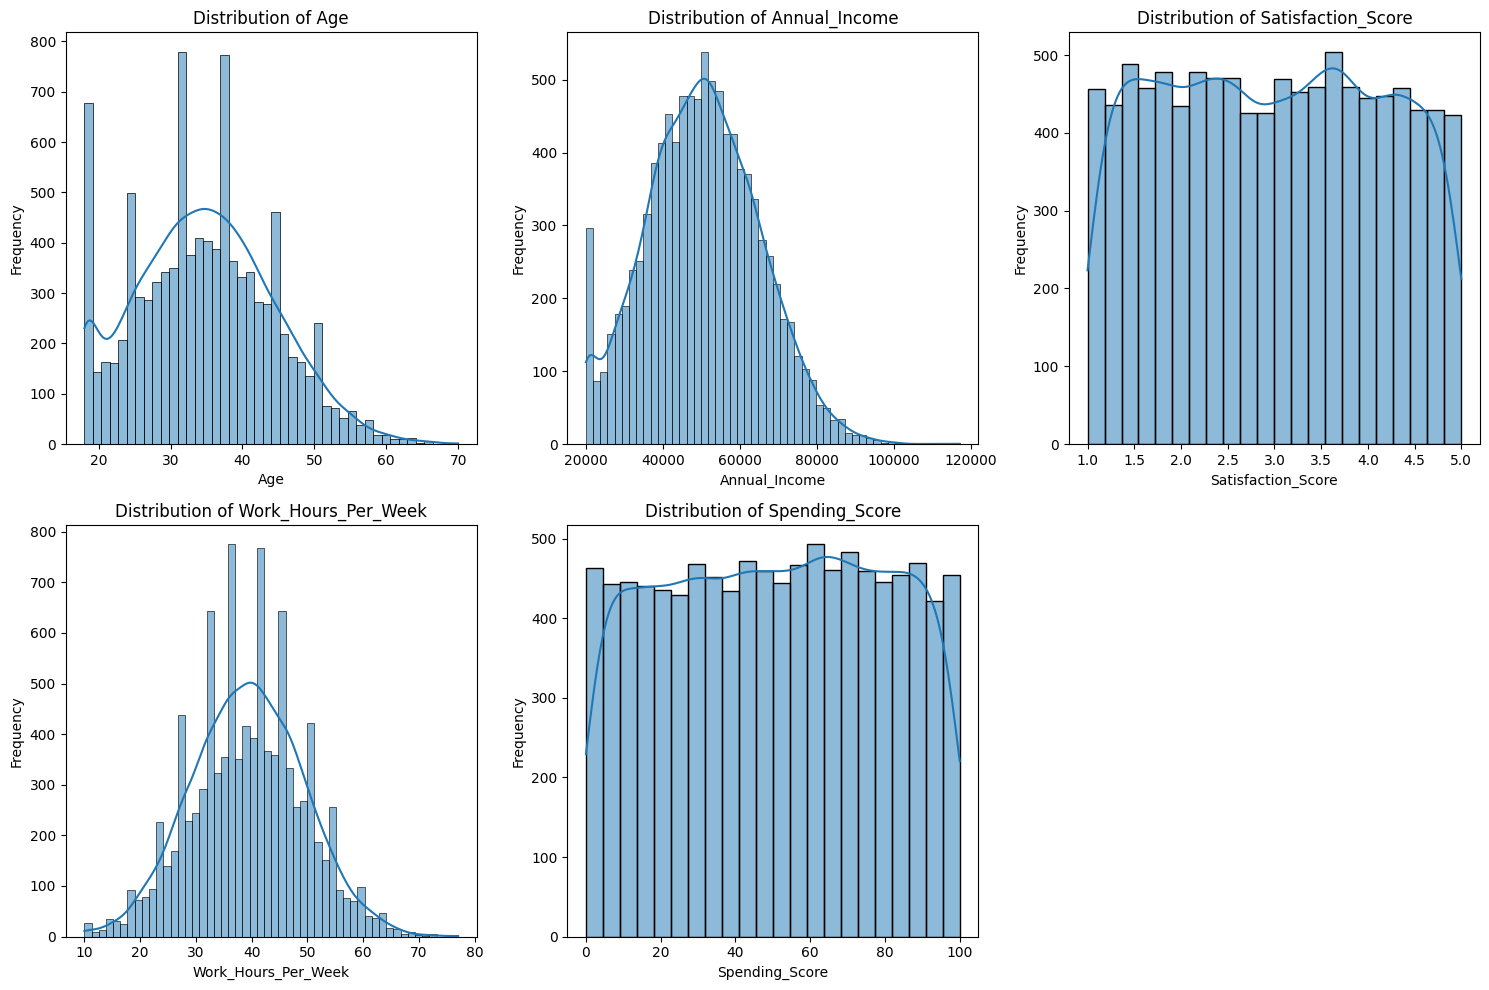

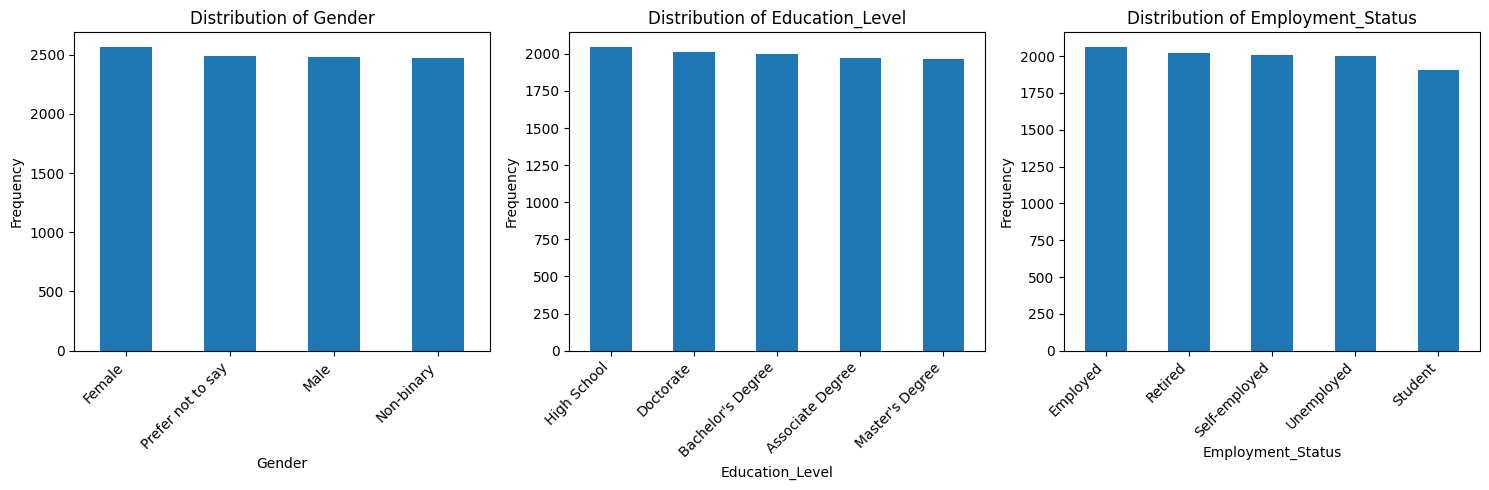

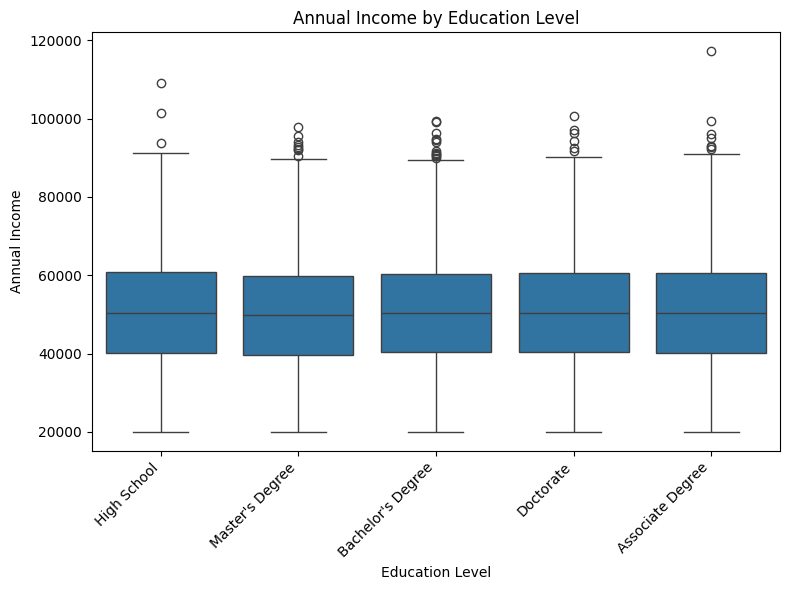

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['Age', 'Annual_Income', 'Satisfaction_Score', 'Work_Hours_Per_Week', 'Spending_Score']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['Gender', 'Education_Level', 'Employment_Status']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Example of a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education_Level', y='Annual_Income', data=df)
plt.title('Annual Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Annual Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform a comprehensive analysis of the survey data to identify potential outliers and correlations between variables.


**Reasoning**:
Calculate descriptive statistics, compute the correlation matrix, and analyze the relationship between categorical and numerical variables. Visualize the results using box plots and a heatmap.



                Age  Annual_Income  Satisfaction_Score  Work_Hours_Per_Week  \
count  10000.000000   10000.000000        10000.000000         10000.000000   
mean      34.683600   50344.418400            2.981257            39.287600   
std        9.588988   14674.234744            1.147687            10.045804   
min       18.000000   20000.000000            1.000000            10.000000   
25%       28.000000   40069.000000            1.980000            32.000000   
50%       34.000000   50237.000000            2.990000            39.000000   
75%       41.000000   60407.500000            3.960000            46.000000   
max       70.000000  117186.000000            5.000000            77.000000   

       Spending_Score  
count    10000.000000  
mean        50.207834  
std         28.700668  
min          0.000000  
25%         25.617500  
50%         50.545000  
75%         74.890000  
max         99.990000  


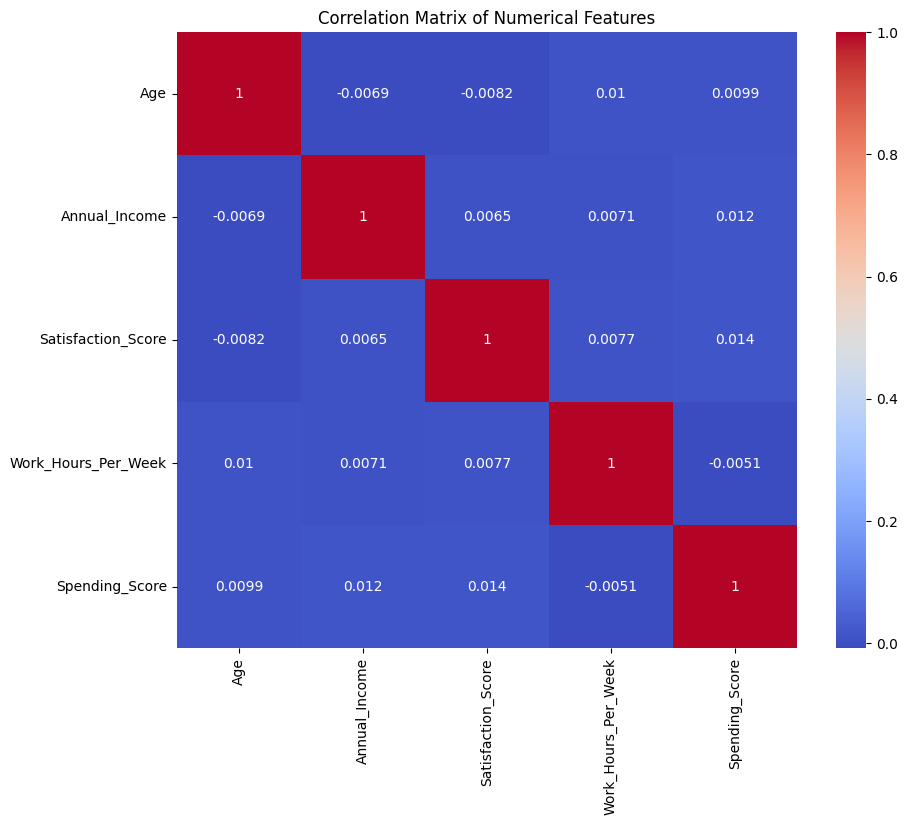

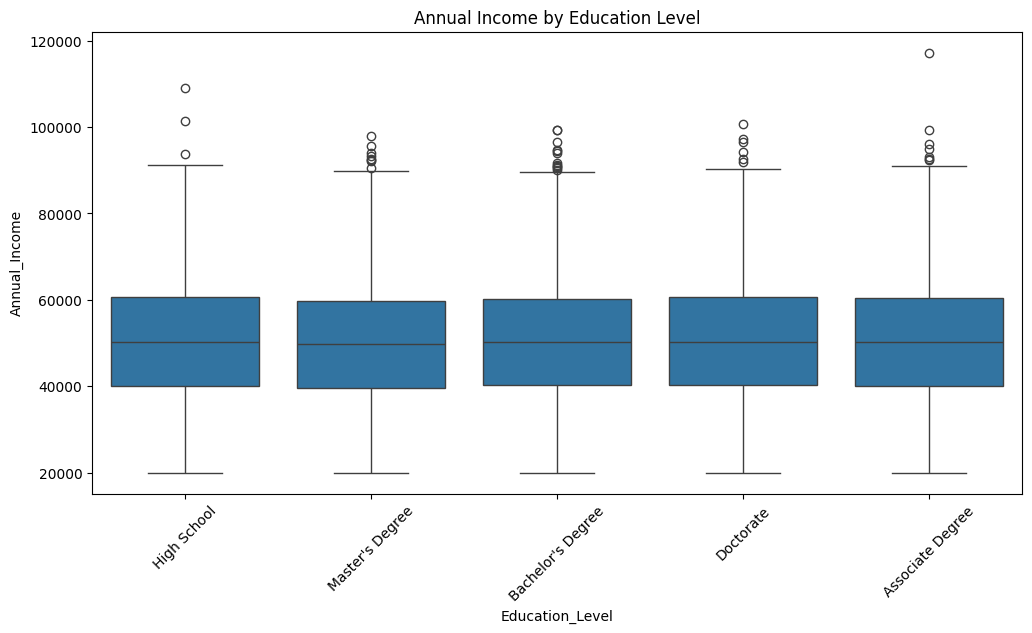

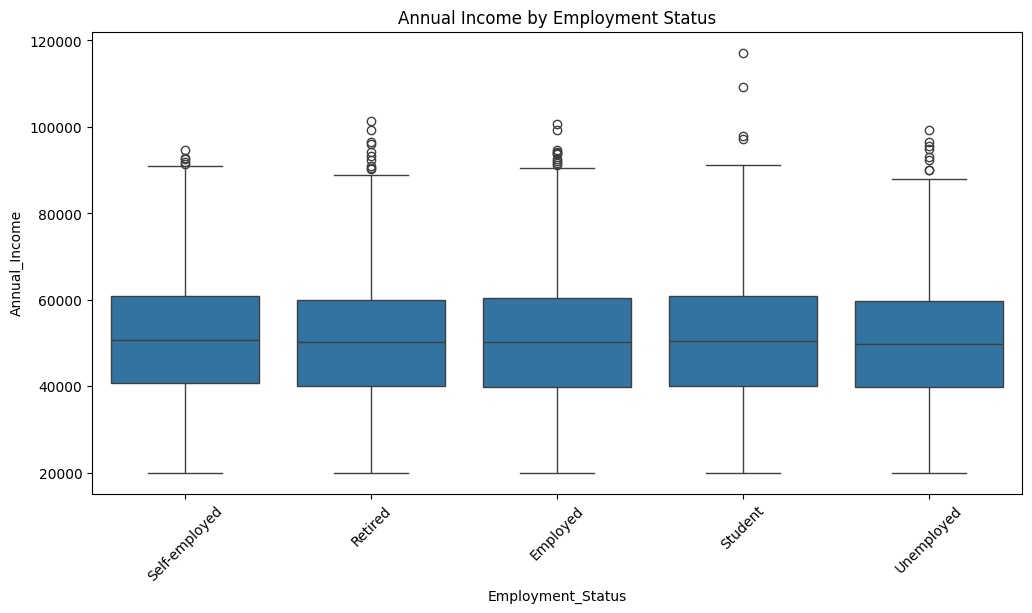

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
numerical_cols = ['Age', 'Annual_Income', 'Satisfaction_Score', 'Work_Hours_Per_Week', 'Spending_Score']
print(df[numerical_cols].describe())

# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between categorical and numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education_Level', y='Annual_Income', data=df)
plt.title('Annual Income by Education Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment_Status', y='Annual_Income', data=df)
plt.title('Annual Income by Employment Status')
plt.xticks(rotation=45)
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Data Characteristics:** The dataset comprises 10,000 rows and 9 columns, with no missing values.  Key numerical columns include 'Age', 'Annual_Income', 'Satisfaction_Score', 'Work_Hours_Per_Week', and 'Spending_Score'.  Categorical columns include 'Gender', 'Education_Level', and 'Employment_Status'.
* **Numerical Distributions:** Visualizations (histograms) reveal the distributions of numerical features. The maximum age observed was 70, maximum annual income was 117186, maximum work hours per week was 77, and maximum spending score was 99.99.
* **Categorical Distributions:** Bar plots illustrate the frequency of each category within the categorical features.
* **Correlations:** A correlation matrix heatmap was generated to show the linear relationships between pairs of numerical variables.  The code focused on the relationships between 'Annual_Income', 'Satisfaction_Score', 'Work_Hours_Per_Week', and 'Spending_Score'.
* **Categorical-Numerical Relationships:** Box plots were used to examine the relationship between 'Annual_Income' and categorical variables like 'Education_Level' and 'Employment_Status'.  These plots help in understanding how annual income varies across different educational levels and employment statuses.


### 3. Insights or Next Steps

* **Investigate potential outliers:**  The maximum values observed for age, annual income, and work hours per week warrant further investigation to determine if they represent legitimate data points or outliers.  Deep dive into these data points with boxplots.
* **Correlation analysis refinement:**  Quantify the correlations observed in the correlation matrix (e.g., correlation coefficients) to understand the strength and direction of relationships between the numerical variables.  Perform further analysis to explore non-linear relationships between variables.
